In [1]:
# basic dependencies

import numpy as np
from numpy import loadtxt
from numpy import savetxt

import pandas as pd
import math
import time
import joblib

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

###########

import pymoo
from pymoo.factory import get_problem

###########

# plotting dependencies
import matplotlib
from matplotlib import pyplot as plt

from scipy.stats import gaussian_kde # for density plot

# this is for the colorbar, you can change the cmap if you prefer other colour schemes
from matplotlib.cm import ScalarMappable
cm = plt.cm.get_cmap('viridis')

# function to return the std dev across runs
def ci(y, N_TRIALS):
    return 1.96 * y.std(axis=0) / np.sqrt(N_TRIALS)

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

Text(0.5, 1.0, 'PDF')

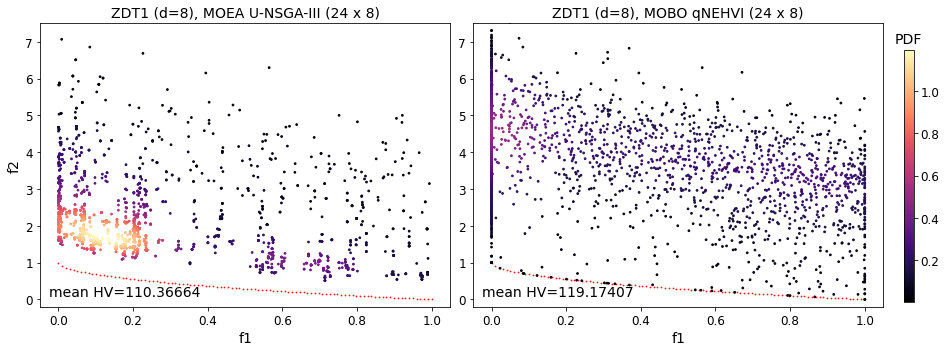

In [2]:
algos = ['MOEA U-NSGA-III', 'MOBO qNEHVI']

problem1 = get_problem("zdt1")
pareto = problem1.pareto_front()

N_TRIALS = 10
noise = 0
N_BATCH = 24
BATCH_SIZE = 8

train_qnehvi_all0 = loadtxt("ZDT1_train_qnehvi_24by8.csv", delimiter=',')
train_qnehvi_all0 = train_qnehvi_all0.reshape(10, 210, 10)
train_nsga3_all0 = loadtxt("ZDT1_train_nsga3_24by8.csv", delimiter=',')
train_nsga3_all0 = train_nsga3_all0.reshape(10, 210, 10)

hvs_qnehvi_all0 = loadtxt("ZDT1_hvs_qnehvi_24by8.csv", delimiter=',')
hvs_nsga3_all0 = loadtxt("ZDT1_hvs_nsga3_24by8.csv", delimiter=',')

train = train_qnehvi_all0

xlist, ylist = [], []

for trial in range(N_TRIALS):

    xlist.append(-train[trial][:,8:10][:,0])
    ylist.append(-train[trial][:,8:10][:,1])

x = np.array(xlist).reshape(-1)
y = np.array(ylist).reshape(-1)
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

train = train_nsga3_all0

xlist, ylist = [], []

for trial in range(N_TRIALS):

    xlist.append(-train[trial][:,8:10][:,0])
    ylist.append(-train[trial][:,8:10][:,1])

x1 = np.array(xlist).reshape(-1)
y1 = np.array(ylist).reshape(-1)
xy1 = np.vstack([x1,y1])
z1 = gaussian_kde(xy1)(xy1)
idx1 = z1.argsort()
x1, y1, z1 = x1[idx1], y1[idx1], z1[idx1]

norm = plt.Normalize(min(z.min(),z1.min()), max(z.max(),z1.max()))

fig, ax = plt.subplots(ncols = 2, figsize = (14,5))


ax[0].scatter(pareto[:,0],
              pareto[:,1], 
              c="r", s=3, marker=".", alpha=0.8)

ax[0].scatter(x1, y1, c=z1, s=3, norm=norm, cmap='magma')

ax[1].scatter(pareto[:,0],
              pareto[:,1], 
              c="r", s=3, marker=".", alpha=0.8)

ax[1].scatter(x, y, c=z, s=3, norm=norm, cmap='magma')


for i, train in enumerate((train_nsga3_all0, train_qnehvi_all0)):
    ax[i].set_title(f"ZDT1 (d=8), {algos[i]} ({N_BATCH} x {BATCH_SIZE})", fontsize=14)
    ax[i].set_xlabel('f1')

    ax[i].set_xlim(-0.05, 1.05)
    ax[i].set_ylim(-0.2, 7.5)
    
ax[0].set_ylabel('f2')

fig.tight_layout()

ax[0].text(-0.025, 0.1, f"mean HV={np.array(hvs_nsga3_all0).mean(axis=0)[-1]:.5f}", fontsize=14)
ax[1].text(-0.025, 0.1, f"mean HV={np.array(hvs_qnehvi_all0).mean(axis=0)[-1]:.5f}", fontsize=14)

sm = ScalarMappable(norm=norm, cmap='magma')
sm.set_array([])
fig.subplots_adjust(right=0.88)
cbar_ax = fig.add_axes([0.9, 0.15, 0.01, 0.7])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.ax.set_title("PDF", fontsize=14)

Text(0.5, 1.0, 'PDF')

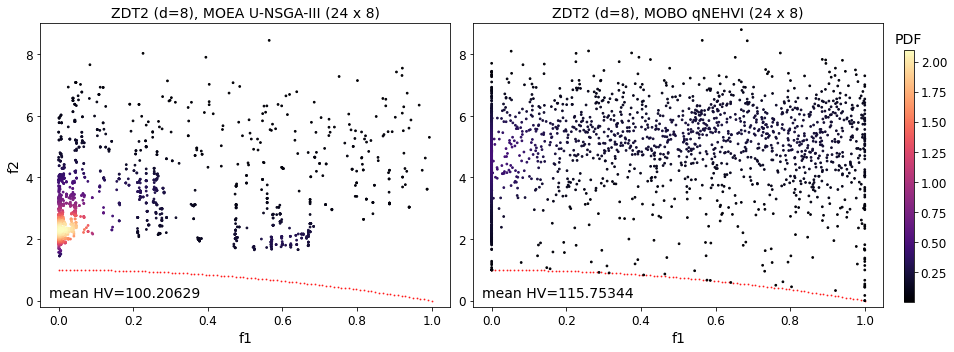

In [3]:
algos = ['MOEA U-NSGA-III', 'MOBO qNEHVI']

problem1 = get_problem("zdt2")
pareto = problem1.pareto_front()

N_TRIALS = 10
noise = 0
N_BATCH = 24
BATCH_SIZE = 8

train_qnehvi_all0 = loadtxt("ZDT2_train_qnehvi_24by8.csv", delimiter=',')
train_qnehvi_all0 = train_qnehvi_all0.reshape(10, 210, 10)
train_nsga3_all0 = loadtxt("ZDT2_train_nsga3_24by8.csv", delimiter=',')
train_nsga3_all0 = train_nsga3_all0.reshape(10, 210, 10)

hvs_qnehvi_all0 = loadtxt("ZDT2_hvs_qnehvi_24by8.csv", delimiter=',')
hvs_nsga3_all0 = loadtxt("ZDT2_hvs_nsga3_24by8.csv", delimiter=',')

train = train_qnehvi_all0

xlist, ylist = [], []

for trial in range(N_TRIALS):

    xlist.append(-train[trial][:,8:10][:,0])
    ylist.append(-train[trial][:,8:10][:,1])

x = np.array(xlist).reshape(-1)
y = np.array(ylist).reshape(-1)
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

train = train_nsga3_all0

xlist, ylist = [], []

for trial in range(N_TRIALS):

    xlist.append(-train[trial][:,8:10][:,0])
    ylist.append(-train[trial][:,8:10][:,1])

x1 = np.array(xlist).reshape(-1)
y1 = np.array(ylist).reshape(-1)
xy1 = np.vstack([x1,y1])
z1 = gaussian_kde(xy1)(xy1)
idx1 = z1.argsort()
x1, y1, z1 = x1[idx1], y1[idx1], z1[idx1]

norm = plt.Normalize(min(z.min(),z1.min()), max(z.max(),z1.max()))

fig, ax = plt.subplots(ncols = 2, figsize = (14,5))


ax[0].scatter(pareto[:,0],
              pareto[:,1], 
              c="r", s=3, marker=".", alpha=0.8)

ax[0].scatter(x1, y1, c=z1, s=3, norm=norm, cmap='magma')

ax[1].scatter(pareto[:,0],
              pareto[:,1], 
              c="r", s=3, marker=".", alpha=0.8)

ax[1].scatter(x, y, c=z, s=3, norm=norm, cmap='magma')


for i, train in enumerate((train_nsga3_all0, train_qnehvi_all0)):
    ax[i].set_title(f"ZDT2 (d=8), {algos[i]} ({N_BATCH} x {BATCH_SIZE})", fontsize=14)
    ax[i].set_xlabel('f1')

    ax[i].set_xlim(-0.05, 1.05)
    ax[i].set_ylim(-0.2, 9.0)
    
ax[0].set_ylabel('f2')

fig.tight_layout()

ax[0].text(-0.025, 0.1, f"mean HV={np.array(hvs_nsga3_all0).mean(axis=0)[-1]:.5f}", fontsize=14)
ax[1].text(-0.025, 0.1, f"mean HV={np.array(hvs_qnehvi_all0).mean(axis=0)[-1]:.5f}", fontsize=14)

sm = ScalarMappable(norm=norm, cmap='magma')
sm.set_array([])
fig.subplots_adjust(right=0.88)
cbar_ax = fig.add_axes([0.9, 0.15, 0.01, 0.7])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.ax.set_title("PDF", fontsize=14)

Text(0.5, 1.0, 'PDF')

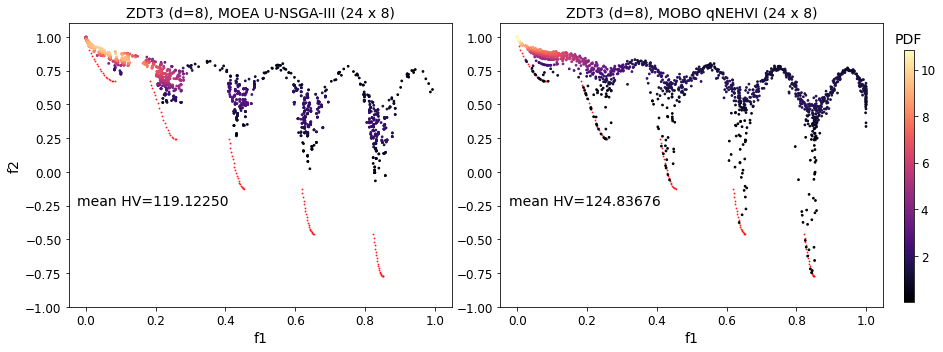

In [4]:
algos = ['MOEA U-NSGA-III', 'MOBO qNEHVI']

problem1 = get_problem("zdt3")
pareto = problem1.pareto_front()

N_TRIALS = 10
noise = 0
N_BATCH = 24
BATCH_SIZE = 8

train_qnehvi_all0 = loadtxt("ZDT3_train_qnehvi_24by8.csv", delimiter=',')
train_qnehvi_all0 = train_qnehvi_all0.reshape(10, 210, 10)
train_nsga3_all0 = loadtxt("ZDT3_train_nsga3_24by8.csv", delimiter=',')
train_nsga3_all0 = train_nsga3_all0.reshape(10, 210, 10)

hvs_qnehvi_all0 = loadtxt("ZDT3_hvs_qnehvi_24by8.csv", delimiter=',')
hvs_nsga3_all0 = loadtxt("ZDT3_hvs_nsga3_24by8.csv", delimiter=',')

train = train_qnehvi_all0

xlist, ylist = [], []

for trial in range(N_TRIALS):

    xlist.append(-train[trial][:,8:10][:,0])
    ylist.append(-train[trial][:,8:10][:,1])

x = np.array(xlist).reshape(-1)
y = np.array(ylist).reshape(-1)
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

train = train_nsga3_all0

xlist, ylist = [], []

for trial in range(N_TRIALS):

    xlist.append(-train[trial][:,8:10][:,0])
    ylist.append(-train[trial][:,8:10][:,1])

x1 = np.array(xlist).reshape(-1)
y1 = np.array(ylist).reshape(-1)
xy1 = np.vstack([x1,y1])
z1 = gaussian_kde(xy1)(xy1)
idx1 = z1.argsort()
x1, y1, z1 = x1[idx1], y1[idx1], z1[idx1]

norm = plt.Normalize(min(z.min(),z1.min()), max(z.max(),z1.max()))

fig, ax = plt.subplots(ncols = 2, figsize = (14,5))


ax[0].scatter(pareto[:,0],
              pareto[:,1], 
              c="r", s=3, marker=".", alpha=0.8)

ax[0].scatter(x1, y1, c=z1, s=3, norm=norm, cmap='magma')

ax[1].scatter(pareto[:,0],
              pareto[:,1], 
              c="r", s=3, marker=".", alpha=0.8)

ax[1].scatter(x, y, c=z, s=3, norm=norm, cmap='magma')


for i, train in enumerate((train_nsga3_all0, train_qnehvi_all0)):
    ax[i].set_title(f"ZDT3 (d=8), {algos[i]} ({N_BATCH} x {BATCH_SIZE})", fontsize=14)
    ax[i].set_xlabel('f1')

    ax[i].set_xlim(-0.05, 1.05)
    ax[i].set_ylim(-1.0, 1.1)
    
ax[0].set_ylabel('f2')
fig.tight_layout()

ax[0].text(-0.025, -0.25, f"mean HV={np.array(hvs_nsga3_all0).mean(axis=0)[-1]:.5f}", fontsize=14)
ax[1].text(-0.025, -0.25, f"mean HV={np.array(hvs_qnehvi_all0).mean(axis=0)[-1]:.5f}", fontsize=14)

sm = ScalarMappable(norm=norm, cmap='magma')
sm.set_array([])
fig.subplots_adjust(right=0.88)
cbar_ax = fig.add_axes([0.9, 0.15, 0.01, 0.7])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.ax.set_title("PDF", fontsize=14)

Text(0.5, 1.0, 'PDF')

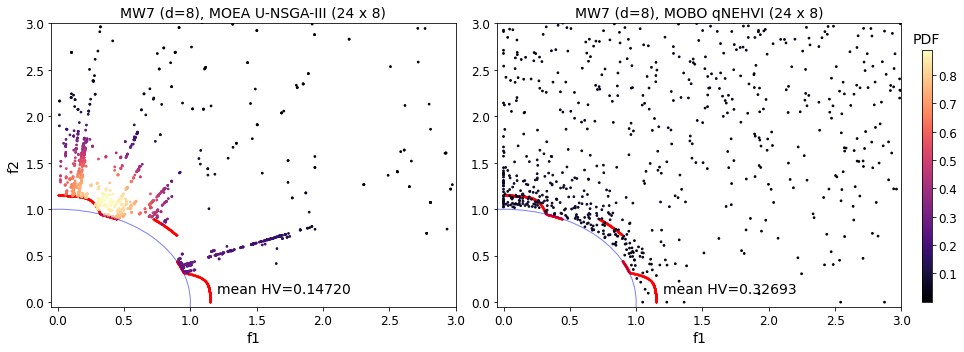

In [5]:
algos = ['MOEA U-NSGA-III', 'MOBO qNEHVI']

problem1 = get_problem("mw7")
pareto = problem1.pareto_front()

N_TRIALS = 10
noise = 0
N_BATCH = 24
BATCH_SIZE = 8

train_qnehvi_all0 = loadtxt("MW7_train_qnehvi_24by8.csv", delimiter=',')
train_qnehvi_all0 = train_qnehvi_all0.reshape(10, 210, 12)
train_nsga3_all0 = loadtxt("MW7_train_nsga3_24by8.csv", delimiter=',')
train_nsga3_all0 = train_nsga3_all0.reshape(10, 210, 12)

hvs_qnehvi_all0 = loadtxt("MW7_hvs_qnehvi_24by8.csv", delimiter=',')
hvs_nsga3_all0 = loadtxt("MW7_hvs_nsga3_24by8.csv", delimiter=',')

train = train_qnehvi_all0

xlist, ylist = [], []

for trial in range(N_TRIALS):

    xlist.append(-train[trial][:,8:10][:,0])
    ylist.append(-train[trial][:,8:10][:,1])

x = np.array(xlist).reshape(-1)
y = np.array(ylist).reshape(-1)
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

train = train_nsga3_all0

xlist, ylist = [], []

for trial in range(N_TRIALS):

    xlist.append(-train[trial][:,8:10][:,0])
    ylist.append(-train[trial][:,8:10][:,1])

x1 = np.array(xlist).reshape(-1)
y1 = np.array(ylist).reshape(-1)
xy1 = np.vstack([x1,y1])
z1 = gaussian_kde(xy1)(xy1)
idx1 = z1.argsort()
x1, y1, z1 = x1[idx1], y1[idx1], z1[idx1]

norm = plt.Normalize(min(z.min(),z1.min()), max(z.max(),z1.max()))

fig, ax = plt.subplots(ncols = 2, figsize = (14,5))


ax[0].scatter(pareto[:,0],
              pareto[:,1], 
              c="r", s=3, marker=".", alpha=0.8)

ax[0].scatter(x1, y1, c=z1, s=3, norm=norm, cmap='magma')

ax[1].scatter(pareto[:,0],
              pareto[:,1], 
              c="r", s=3, marker=".", alpha=0.8)

ax[1].scatter(x, y, c=z, s=3, norm=norm, cmap='magma')


for i, train in enumerate((train_nsga3_all0, train_qnehvi_all0)):
    ax[i].set_title(f"MW7 (d=8), {algos[i]} ({N_BATCH} x {BATCH_SIZE})", fontsize=14)
    ax[i].set_xlabel('f1')

    ax[i].set_xlim(-0.05, 3)
    ax[i].set_ylim(-0.05, 3)
    
    ax[i].add_patch(plt.Circle((0, 0), 1, color='b', fill=False, alpha=0.5))

    
fig.tight_layout()

ax[0].set_ylabel('f2')

ax[0].text(1.2, 0.1, f"mean HV={np.array(hvs_nsga3_all0).mean(axis=0)[-1]:.5f}", fontsize=14)
ax[1].text(1.2, 0.1, f"mean HV={np.array(hvs_qnehvi_all0).mean(axis=0)[-1]:.5f}", fontsize=14)

sm = ScalarMappable(norm=norm, cmap='magma')
sm.set_array([])
fig.subplots_adjust(right=0.88)
cbar_ax = fig.add_axes([0.9, 0.15, 0.01, 0.7])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.ax.set_title("PDF", fontsize=14)

In [6]:
train_qnehvi_all0 = loadtxt("thinfilm_train_qnehvi_24by8.csv", delimiter=',')
train_qnehvi_all0 = train_qnehvi_all0.reshape(2020, 6)
train_nsga3_all0 = loadtxt("thinfilm_train_nsga3_24by8.csv", delimiter=',')
train_nsga3_all0 = train_nsga3_all0.reshape(2020, 6)

hvs_qnehvi_all0 = loadtxt("thinfilm_hvs_qnehvi_24by8.csv", delimiter=',')
hvs_nsga3_all0 = loadtxt("thinfilm_hvs_nsga3_24by8.csv", delimiter=',')

xscaler = joblib.load('thinfilm_xscaler')
yscaler = joblib.load('thinfilm_yscaler')
    
pareto_y1 = loadtxt("thinfilm_pareto1.csv", delimiter=',')
pareto_y2 = loadtxt("thinfilm_pareto2.csv", delimiter=',')  

In [7]:
train = train_qnehvi_all0

x_true = xscaler.inverse_transform(train[...,0:4])[...,-1]
y_true = yscaler.inverse_transform(train[...,-1:]).ravel()
xy = np.vstack([x_true,y_true])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = x_true[idx], y_true[idx], z[idx]

train = train_nsga3_all0

x_true1 = xscaler.inverse_transform(train[...,0:4])[...,-1]
y_true1 = yscaler.inverse_transform(train[...,-1:]).ravel()
xy1 = np.vstack([x_true1,y_true1])
z1 = gaussian_kde(xy1)(xy1)
idx1 = z1.argsort()
x1, y1, z1 = x_true1[idx1], y_true1[idx1], z1[idx1]

Text(0.5, 1.0, 'PDF')

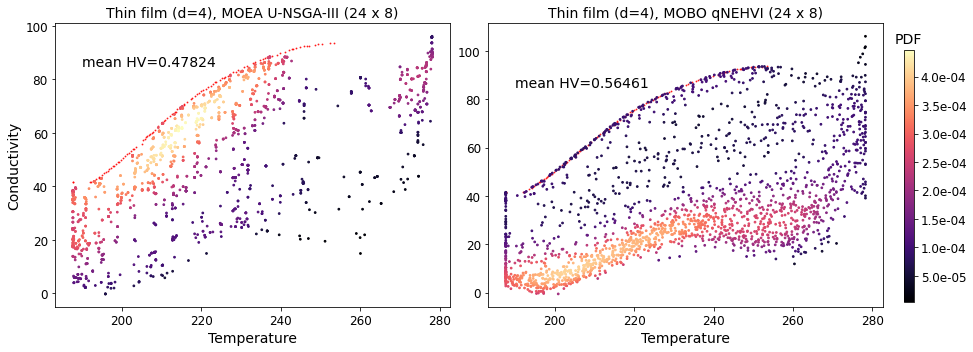

In [9]:
cmap = 'magma'
algos = ['MOEA U-NSGA-III', 'MOBO qNEHVI']


N_TRIALS = 10
noise = 0
N_BATCH = 24
BATCH_SIZE = 8

norm = plt.Normalize(min(z.min(),z1.min()), max(z.max(),z1.max()))

fig, ax = plt.subplots(ncols = 2, figsize = (14,5))

ax[0].scatter(pareto_y1,
              pareto_y2, 
              c="r", s=3, marker=".", alpha=0.8)

ax[0].scatter(x1, y1, c=z1, s=3, norm=norm, cmap='magma')

ax[1].scatter(pareto_y1,
              pareto_y2, 
              c="r", s=3, marker=".", alpha=0.8)

ax[1].scatter(x, y, c=z, s=3, norm=norm, cmap='magma')

for i, train in enumerate((train_nsga3_all0, train_qnehvi_all0)):
    ax[i].set_title(f"Thin film (d=4), {algos[i]} ({N_BATCH} x {BATCH_SIZE})", fontsize=14)
    ax[i].set_xlabel('Temperature')

    #ax[i].set_xlim(-0.05, 1.125)
    #ax[i].set_ylim(-0.2, 7.2)
    
ax[0].set_ylabel('Conductivity')
fig.tight_layout()


ax[0].text(190, 85, f"mean HV={np.array(hvs_nsga3_all0).mean(axis=0)[-1]:.5f}", fontsize=14)
ax[1].text(190, 85, f"mean HV={np.array(hvs_qnehvi_all0).mean(axis=0)[-1]:.5f}", fontsize=14)

sm = ScalarMappable(norm=norm, cmap='magma')
sm.set_array([])
fig.subplots_adjust(right=0.88)
cbar_ax = fig.add_axes([0.9, 0.15, 0.01, 0.7])
cbar = fig.colorbar(sm, cax=cbar_ax, format='%.1e')
cbar.ax.set_title("PDF", fontsize=14)


In [10]:
train_qnehvi_all0 = loadtxt("concrete_train_qnehvi_24by8.csv", delimiter=',')
train_qnehvi_all0 = train_qnehvi_all0.reshape(2080, 9)
train_nsga3_all0 = loadtxt("concrete_train_nsga3_24by8.csv", delimiter=',')
train_nsga3_all0 = train_nsga3_all0.reshape(2080, 9)

hvs_qnehvi_all0 = loadtxt("concrete_hvs_qnehvi_24by8.csv", delimiter=',')
hvs_nsga3_all0 = loadtxt("concrete_hvs_nsga3_24by8.csv", delimiter=',')

yscaler = joblib.load('concrete_yscaler')
    
pareto_y = loadtxt("concrete_pareto.csv", delimiter=',')

train = train_qnehvi_all0

real_y = yscaler.inverse_transform(train[...][...,-2:])
xy = np.vstack([real_y[:,0],real_y[:,1]])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = real_y[:,0][idx], real_y[:,1][idx], z[idx]

train = train_nsga3_all0

real_y1 = yscaler.inverse_transform(train[...][...,-2:])
xy1 = np.vstack([real_y1[:,0],real_y1[:,1]])
z1 = gaussian_kde(xy1)(xy1)
idx1 = z1.argsort()
x1, y1, z1 = real_y1[:,0][idx1], real_y1[:,1][idx1], z1[idx1]


Text(0.5, 1.0, 'PDF')

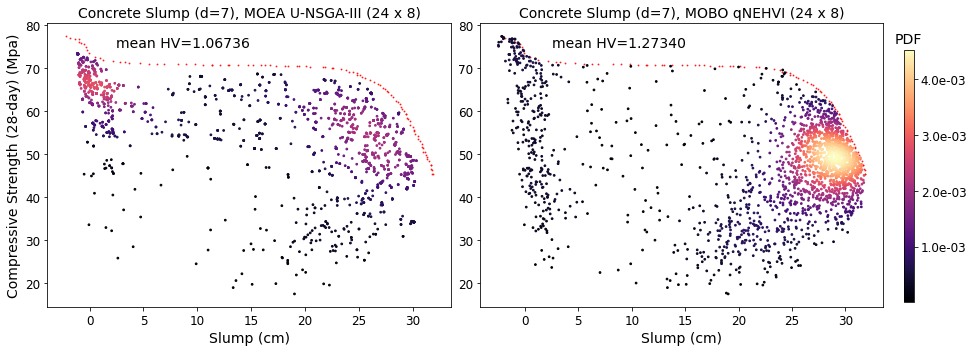

In [11]:
cmap = 'magma'
algos = ['MOEA U-NSGA-III', 'MOBO qNEHVI']


N_TRIALS = 10
noise = 0
N_BATCH = 24
BATCH_SIZE = 8

norm = plt.Normalize(min(z.min(),z1.min()), max(z.max(),z1.max()))

fig, ax = plt.subplots(ncols = 2, figsize = (14,5))

ax[0].scatter(pareto_y[:,0],
              pareto_y[:,1], 
              c="r", s=3, marker=".", alpha=0.8)

ax[0].scatter(x1, y1, c=z1, s=3, norm=norm, cmap='magma')

ax[1].scatter(pareto_y[:,0],
              pareto_y[:,1], 
              c="r", s=3, marker=".", alpha=0.8)

ax[1].scatter(x, y, c=z, s=3, norm=norm, cmap='magma')

for i, train in enumerate((train_nsga3_all0, train_qnehvi_all0)):
    ax[i].set_title(f"Concrete Slump (d=7), {algos[i]} ({N_BATCH} x {BATCH_SIZE})", fontsize=14)
    ax[i].set_xlabel('Slump (cm)')

    #ax[i].set_xlim(-0.05, 1.125)
    #ax[i].set_ylim(-0.2, 7.2)
    
ax[0].set_ylabel('Compressive Strength (28-day) (Mpa)')
fig.tight_layout()


ax[0].text(2.5, 75, f"mean HV={np.array(hvs_nsga3_all0).mean(axis=0)[-1]:.5f}", fontsize=14)
ax[1].text(2.5, 75, f"mean HV={np.array(hvs_qnehvi_all0).mean(axis=0)[-1]:.5f}", fontsize=14)

sm = ScalarMappable(norm=norm, cmap='magma')
sm.set_array([])
fig.subplots_adjust(right=0.88)
cbar_ax = fig.add_axes([0.9, 0.15, 0.01, 0.7])
cbar = fig.colorbar(sm, cax=cbar_ax, format='%.1e')
cbar.ax.set_title("PDF", fontsize=14)